# **Airline Passenger Satisfaction**

Dataset link: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/data

The dataset is centered on analyzing an airline passenger satisfaction survey, aiming to understand the key factors influencing passenger satisfaction or dissatisfaction. It includes a mix of demographic information, travel details, and survey responses about passengers' experiences with the airline.

**About Dataset:**

* Gender: Gender of the passengers (Female, Male)
* Customer Type: The customer type (Loyal customer, disloyal customer)
* Age: The actual age of the passengers
* Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
* Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
* Flight distance: The flight distance of this journey
* Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
* Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
* Ease of Online booking: Satisfaction level of online booking
* Gate location: Satisfaction level of Gate location
* Food and drink: Satisfaction level of Food and drink
* Online boarding: Satisfaction level of online boarding
* Seat comfort: Satisfaction level of Seat comfort
* Inflight entertainment: Satisfaction level of inflight entertainment
* On-board service: Satisfaction level of On-board service
* Leg room service: Satisfaction level of Leg room service
* Baggage handling: Satisfaction level of baggage handling
* Check-in service: Satisfaction level of Check-in service
* Inflight service: Satisfaction level of inflight service
* Cleanliness: Satisfaction level of Cleanliness
* Departure Delay in Minutes: Minutes delayed when departure
* Arrival Delay in Minutes: Minutes delayed when Arrival
* Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score, recall_score, f1_score,ConfusionMatrixDisplay,classification_report
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, RobustScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, recall_score, precision_score, f1_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score, silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Import the train and test data
train_data=pd.read_csv("https://raw.githubusercontent.com/Steivann/Dataset/refs/heads/main/test.csv")
test_data=pd.read_csv("https://raw.githubusercontent.com/Steivann/Dataset/refs/heads/main/train.csv")

In [ ]:
train_data.shape

(25976, 25)

In [ ]:
test_data.shape

(103904, 25)

In [ ]:
train_data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [ ]:
# dropping some columns from train data
train_data.drop(["Unnamed: 0","id"], axis=1, inplace=True)

In [ ]:
train_data.shape

(25976, 23)

In [ ]:
test_data.shape

(103904, 25)

In [ ]:
# dropping some columns from test data
test_data.drop(["Unnamed: 0","id"], axis=1, inplace=True)

In [ ]:
test_data.shape

(103904, 23)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

In [ ]:
train_data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


In [ ]:
train_data.duplicated().sum()

0

# **Data Cleaning**

In [ ]:
# Checking missing values
train_data.isnull().sum()

,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Gate location,0


In [ ]:
test_data.isnull().sum()

,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Gate location,0


In [ ]:
# Using simple imputer to replace missing values in a robust way, maintaining data integrity and ensuring that the analysis or model isn't affected by gaps in the dataset.
imputer=SimpleImputer(missing_values=np.nan, strategy="median", fill_value=None)
train_data["Arrival Delay in Minutes"]= imputer.fit_transform(train_data[["Arrival Delay in Minutes"]])
test_data["Arrival Delay in Minutes"]= imputer.fit_transform(test_data[["Arrival Delay in Minutes"]])

In [ ]:
train_data.isnull().sum()

,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Gate location,0


In [ ]:
test_data.isnull().sum()

,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Gate location,0


In [ ]:
train_data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
train_data['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [ ]:
train_data['Type of Travel'].unique()

array(['Business travel', 'Personal Travel'], dtype=object)

In [ ]:
train_data['Class'].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

In [ ]:
train_data['satisfaction'].unique()

array(['satisfied', 'neutral or dissatisfied'], dtype=object)

In [ ]:
gender_mapping = {'Male': 0, 'Female': 1}
customer_type_mapping = {'Loyal Customer': 0, 'disloyal Customer': 1}
type_of_travel_mapping = {'Business travel': 0, 'Personal Travel': 1}
class_mapping = {'Eco': 0, 'Eco Plus': 1, 'Business': 2}
satisfaction_mapping = {'satisfied': 1, 'neutral or dissatisfied': 0}

# Apply the mappings to the train_data
train_data['Gender'] = train_data['Gender'].map(gender_mapping)
train_data['Customer Type'] = train_data['Customer Type'].map(customer_type_mapping)
train_data['Type of Travel'] = train_data['Type of Travel'].map(type_of_travel_mapping)
train_data['Class'] = train_data['Class'].map(class_mapping)
train_data['satisfaction'] = train_data['satisfaction'].map(satisfaction_mapping)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Check the result
train_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,52,0,0,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,1
1,1,0,36,0,2,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,1
2,0,1,20,0,0,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,0
3,0,0,44,0,2,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,1
4,1,0,49,0,0,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,1


In [ ]:
gender_mapping = {'Male': 0, 'Female': 1}
customer_type_mapping = {'Loyal Customer': 0, 'disloyal Customer': 1}
type_of_travel_mapping = {'Business travel': 0, 'Personal Travel': 1}
class_mapping = {'Eco': 0, 'Eco Plus': 1, 'Business': 2}
satisfaction_mapping = {'satisfied': 1, 'neutral or dissatisfied': 0}

# Apply the mappings to the train_data
test_data['Gender'] = test_data['Gender'].map(gender_mapping)
test_data['Customer Type'] = test_data['Customer Type'].map(customer_type_mapping)
test_data['Type of Travel'] = test_data['Type of Travel'].map(type_of_travel_mapping)
test_data['Class'] = test_data['Class'].map(class_mapping)
test_data['satisfaction'] = test_data['satisfaction'].map(satisfaction_mapping)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Check the result
test_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,13,1,1,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,0,1,25,0,2,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,1,0,26,0,2,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,1,0,25,0,2,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,0,0,61,0,2,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


# Exploratory Data Analysis (EDA)

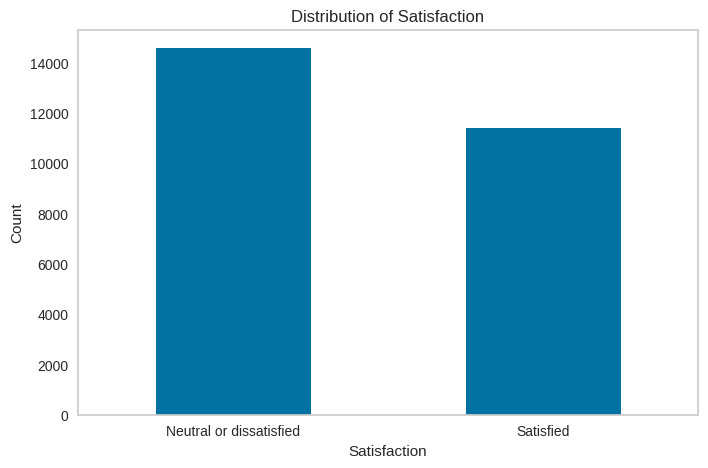

In [ ]:
plt.figure(figsize=(8, 5))
ax = train_data['satisfaction'].value_counts().plot(kind='bar')

ax.set_xticklabels(['Neutral or dissatisfied', 'Satisfied'])
plt.title("Distribution of Satisfaction")
plt.xlabel("Satisfaction")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(False)

plt.show()

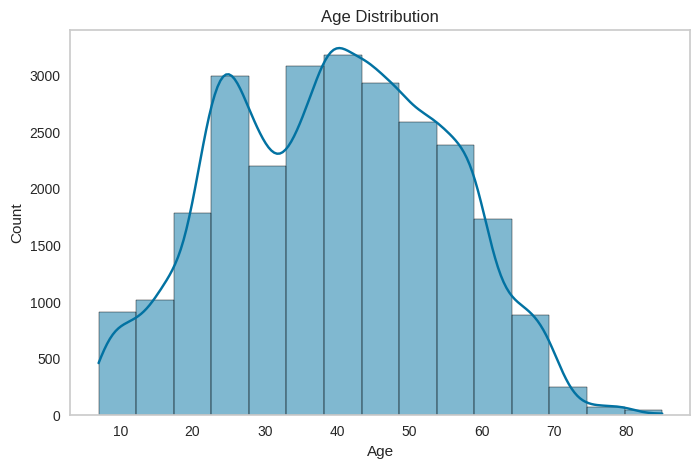

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(train_data['Age'], kde=True, bins=15)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.grid(False)
plt.show()

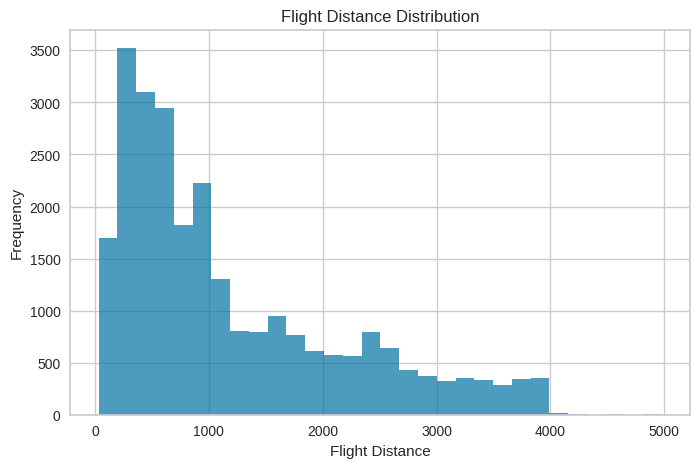

In [ ]:
# Flight Distance distribution
plt.figure(figsize=(8, 5))
train_data['Flight Distance'].plot(kind='hist', bins=30, alpha=0.7)
plt.title("Flight Distance Distribution")
plt.xlabel("Flight Distance")
plt.ylabel("Frequency")
plt.show()

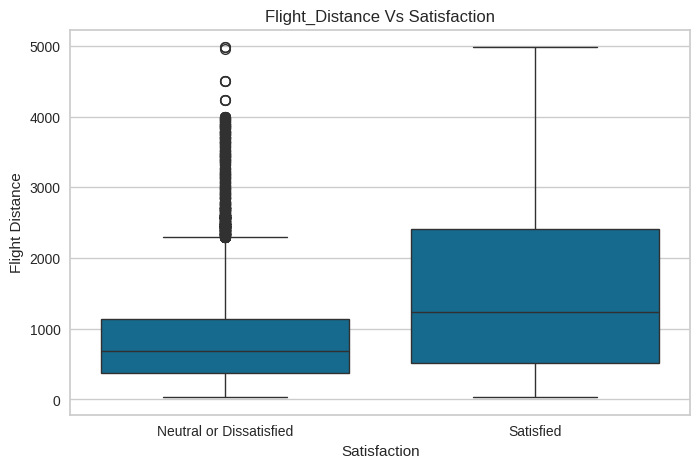

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='satisfaction', y='Flight Distance', data=train_data)
plt.title("Flight_Distance Vs Satisfaction")
plt.xlabel("Satisfaction")
plt.ylabel("Flight Distance")
plt.xticks([0, 1], ['Neutral or Dissatisfied', 'Satisfied'])
plt.show()

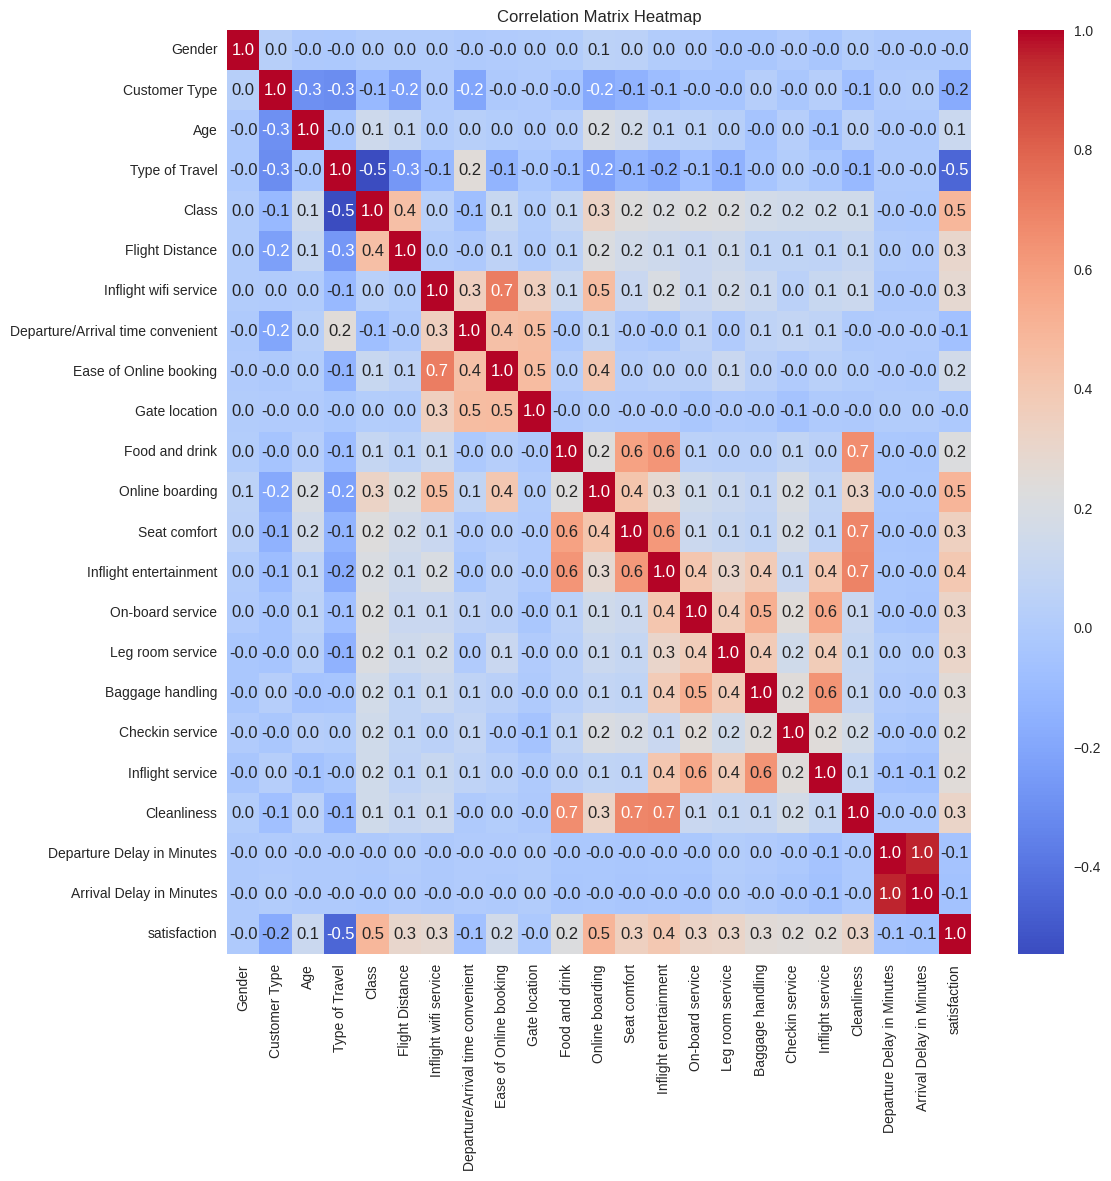

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# data preprocessing

In [ ]:
# Drop the column because it has a perfect correlation (1), causing data redundancy and potentially leading to multicollinearity in the model.
train_data.drop("Departure Delay in Minutes", axis=1, inplace=True)
test_data.drop("Departure Delay in Minutes", axis=1, inplace=True)

In [ ]:
x_train=train_data.drop(["satisfaction"], axis=1)
y_train=train_data["satisfaction"]
x_test=test_data.drop(["satisfaction"], axis=1)
y_test=test_data["satisfaction"]

In [ ]:
# Function to apply the Winsorization method for removing outliers
def Winsorization_Method(columns, x_train, y_train, a, b):
    outliers = []

    # Loop through each column to detect outliers
    for col in columns:
        # Calculate the lower and upper quantiles (a and b are percentiles)
        q1 = np.percentile(x_train[col], a)
        q2 = np.percentile(x_train[col], b)

        # Loop through each value in the column to check for outliers
        for pos in range(len(x_train)):
            # Check if the value is outside the defined range (outliers)
            if x_train[col].iloc[pos] > q2 or x_train[col].iloc[pos] < q1:
                outliers.append(pos)  # Add the index to the outliers list

    # Remove duplicates from the outliers list (convert it to a set)
    outliers = set(outliers)
    outliers = list(outliers)

    # Calculate the ratio of outliers as a percentage of the total data
    ratio = round(len(outliers) / len(x_train) * 100, 2)

    # Drop the outliers from the training dataset (both features and labels)
    x_train.drop(x_train.index[outliers], inplace=True)
    y_train.drop(y_train.index[outliers], inplace=True)

    # Return the ratio of outliers, along with the modified datasets (without outliers)
    return ratio, x_train, y_train

In [ ]:
ratio, x_train, y_train= Winsorization_Method(x_train.select_dtypes(exclude="object").columns, x_train, y_train , a=1, b=99)

In [ ]:
print(f"Ratio of Outliers Detected in the dataset:{ratio}")

Ratio of Outliers Detected in the dataset:4.11


# Modeling

Model: DecisionTreeClassifier
Accuracy: 94.23%
ROC AUC: 0.9360773999668563
Recall: 0.9160244308717379
Precision: 0.9410637278390034
F1-Score: 0.9283752757394319
Best Estimator: DecisionTreeClassifier(max_depth=13, min_samples_split=70, random_state=42)
Classification Report
---------------------
              precision    recall  f1-score   support

           0      0.937     0.956     0.947     58879
           1      0.941     0.916     0.928     45025

    accuracy                          0.939    103904
   macro avg      0.939     0.936     0.937    103904
weighted avg      0.939     0.939     0.939    103904

Confusion Matrix
---------------------


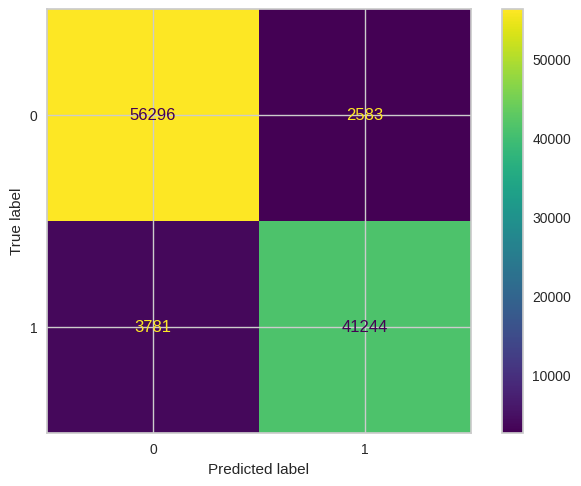

In [ ]:
# Initialize Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Parameter Grid for Decision Tree
dt_param_grid = {
    "min_samples_split": range(10, 500, 20),
    "max_depth": range(1, 20, 2)
}

# Perform GridSearchCV for Decision Tree
model_dt = GridSearchCV(dt, dt_param_grid, cv=5, scoring="accuracy", n_jobs=-1)
model_dt.fit(x_train, y_train)

y_pred_dt = model_dt.predict(x_test)

# Metrics for Decision Tree
dt_cv_result = model_dt.best_score_
dt_roc_auc_score = roc_auc_score(y_test, y_pred_dt)
dt_recall_score = recall_score(y_test, y_pred_dt)
dt_precision_score = precision_score(y_test, y_pred_dt)
dt_f1_score = f1_score(y_test, y_pred_dt)
dt_best_estimator = model_dt.best_estimator_

# Output results for Decision Tree
print("Model: DecisionTreeClassifier")
print(f"Accuracy: {round(dt_cv_result * 100, 2)}%")
print(f"ROC AUC: {dt_roc_auc_score}")
print(f"Recall: {dt_recall_score}")
print(f"Precision: {dt_precision_score}")
print(f"F1-Score: {dt_f1_score}")
print(f"Best Estimator: {dt_best_estimator}")
print("Classification Report")
print("---------------------")
print(classification_report(y_test, y_pred_dt, digits=3))
print("Confusion Matrix")
print("---------------------")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt)
plt.show()

Model: RandomForestClassifier
Accuracy: 95.73%
ROC AUC: 0.9556397148693668
Recall: 0.9400333148250972
Precision: 0.9615384615384616
F1-Score: 0.9506642857945038
Best Estimator: RandomForestClassifier(max_features=10, min_samples_split=10, n_estimators=300,
                       random_state=42)
Classification Report
---------------------
              precision    recall  f1-score   support

           0      0.955     0.971     0.963     58879
           1      0.962     0.940     0.951     45025

    accuracy                          0.958    103904
   macro avg      0.958     0.956     0.957    103904
weighted avg      0.958     0.958     0.958    103904

Confusion Matrix
---------------------


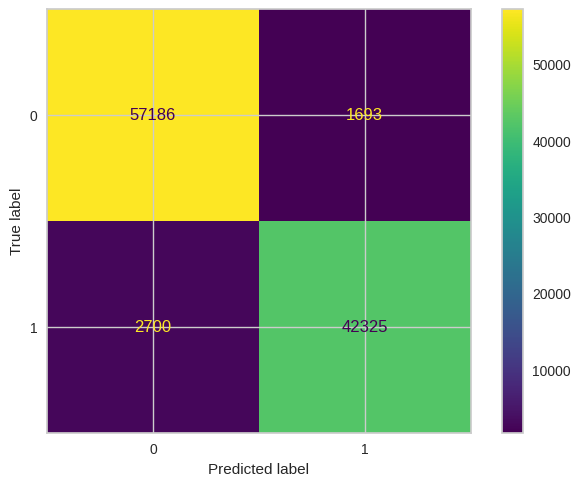

In [ ]:
# Random Forest (RF)
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Parameter Grid for Random Forest
rf_param_grid = {
    "max_features": [10],
    "min_samples_split": [10],
    "min_samples_leaf": [1, 3, 10],
    "n_estimators": [300],
    "criterion": ["gini"]
}

# Perform GridSearchCV for Random Forest
model_rf = GridSearchCV(rf, rf_param_grid, cv=5, scoring="accuracy", n_jobs=-1)
model_rf.fit(x_train, y_train)

y_pred_rf = model_rf.predict(x_test)

# Metrics for Random Forest
rf_cv_result = model_rf.best_score_
rf_roc_auc_score = roc_auc_score(y_test, y_pred_rf)
rf_recall_score = recall_score(y_test, y_pred_rf)
rf_precision_score = precision_score(y_test, y_pred_rf)
rf_f1_score = f1_score(y_test, y_pred_rf)
rf_best_estimator = model_rf.best_estimator_

# Output results for Random Forest
print("Model: RandomForestClassifier")
print(f"Accuracy: {round(rf_cv_result * 100, 2)}%")
print(f"ROC AUC: {rf_roc_auc_score}")
print(f"Recall: {rf_recall_score}")
print(f"Precision: {rf_precision_score}")
print(f"F1-Score: {rf_f1_score}")
print(f"Best Estimator: {rf_best_estimator}")
print("Classification Report")
print("---------------------")
print(classification_report(y_test, y_pred_rf, digits=3))
print("Confusion Matrix")
print("---------------------")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.show()

In [ ]:
# Creating a result DataFrame
result_df = pd.DataFrame({
    'Model': ['DecisionTreeClassifier', 'RandomForestClassifier'],
    'Recall': [dt_recall_score, rf_recall_score],
    'Precision': [dt_precision_score, rf_precision_score],
    'F1_Score': [dt_f1_score, rf_f1_score],
    'AUC_Score': [dt_roc_auc_score, rf_roc_auc_score],
    'Accuracy': [dt_cv_result, rf_cv_result]
})

result_df = result_df.sort_values(by="AUC_Score", ascending=False)

# Show the result dataframe
print(result_df)

                    Model    Recall  Precision  F1_Score  AUC_Score  Accuracy
1  RandomForestClassifier  0.940033   0.961538  0.950664   0.955640  0.957312
0  DecisionTreeClassifier  0.916024   0.941064  0.928375   0.936077  0.942339


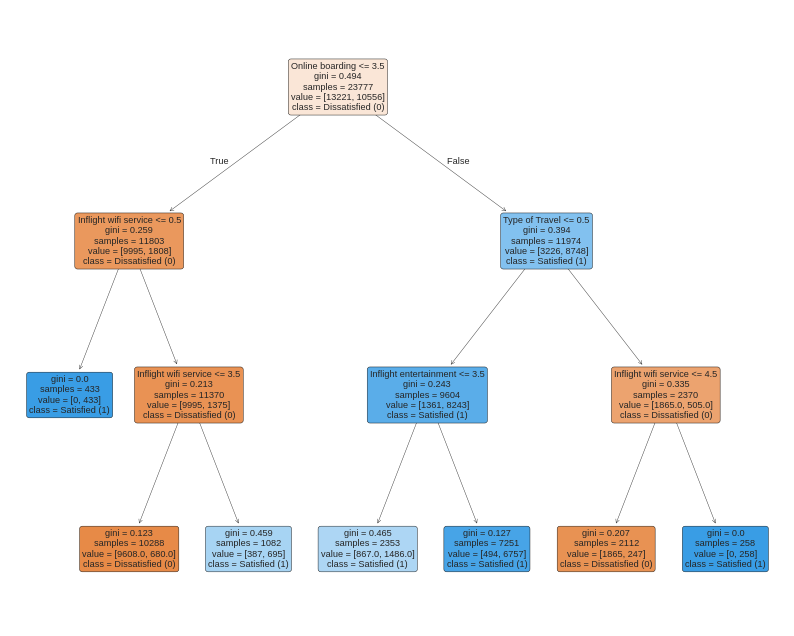

In [ ]:
plt.figure(figsize=(10,8))
_= plot_tree(DecisionTreeClassifier(max_depth=3).fit(x_train,y_train),feature_names=x_train.columns, class_names=['Dissatisfied (0)','Satisfied (1)'],
                                    label='all', filled=True, rounded=True)

# **Clustering**

In [ ]:
# Initializing the KMeans algorithm
kmeans = KMeans(n_clusters=3, init="random", max_iter=500, random_state=42)
y_pred = kmeans.fit_predict(train_data)

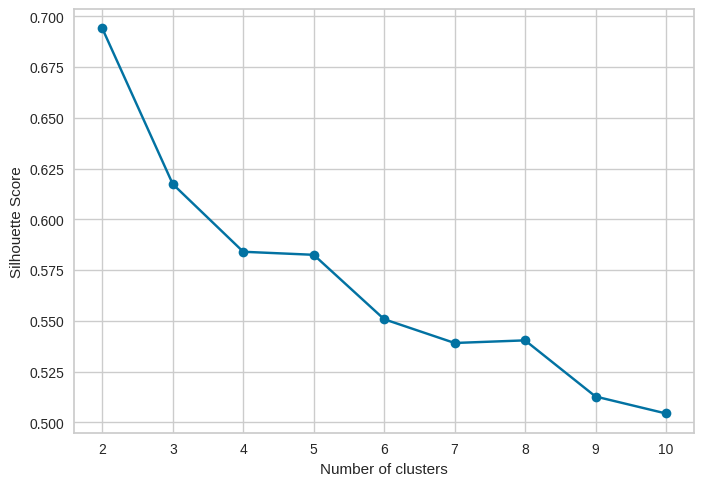

In [ ]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='random', max_iter=300, random_state=42)
    kmeans.fit(train_data)
    silhouette_scores.append(silhouette_score(train_data, kmeans.labels_))

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
silhouette_avg = silhouette_score(train_data, y_pred)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.6173542144614724


In [ ]:
data_kmeans = train_data.copy()
data_kmeans["Clusters"]= y_pred
data_kmeans.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction,Clusters
0,1,0,52,0,0,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,44.0,1,2
1,1,0,36,0,2,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0.0,1,1
2,0,1,20,0,0,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0.0,0,2
3,0,0,44,0,2,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,6.0,1,1
4,1,0,49,0,0,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,20.0,1,0


In [ ]:
# Terapkan K-Means
kmeans = KMeans(n_clusters=3, random_state=0)
train_data['Clusters'] = kmeans.fit_predict(train_data)

cluster_summary = data_kmeans.groupby('Clusters').agg({
    'Age': ['mean', 'std', 'min', 'max'],
    'Flight Distance': ['mean', 'std', 'min', 'max'],
    'Inflight wifi service': ['mean', 'std', 'min', 'max'],
    'Ease of Online booking': ['mean', 'std', 'min', 'max'],
    'Seat comfort': ['mean', 'std', 'min', 'max'],
    'satisfaction': [pd.Series.mode],
})

# Transpose agar hasilnya menjadi vertikal (baris) dan klaster menjadi kolom
cluster_summary = cluster_summary.T

# Ubah nama klaster menjadi 'Cluster 0', 'Cluster 1', dll.
cluster_summary.columns = [f'Cluster {i}' for i in range(cluster_summary.shape[1])]
cluster_summary.columns.name = 'KMeans'

# Tampilkan hasil
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

cluster_summary

KMeans                         Cluster 0    Cluster 1    Cluster 2
Age                    mean    40.261829    42.926859    38.557596
                       std     14.593968    12.809539    15.722026
                       min      7.000000     7.000000     7.000000
                       max     80.000000    85.000000    85.000000
Flight Distance        mean  1692.313412  3070.947929   543.341695
                       std    361.142484   509.006414   282.292201
                       min   1118.000000  2381.000000    31.000000
                       max   2381.000000  4983.000000  1117.000000
Inflight wifi service  mean     2.735859     2.732139     2.719014
                       std      1.354242     1.422731     1.305569
                       min      0.000000     0.000000     0.000000
                       max      5.000000     5.000000     5.000000
Ease of Online booking mean     2.816969     2.905062     2.698182
                       std      1.410729     1.488390     1.390279
                       min      0.000000     0.000000     0.000000
                       max      5.000000     5.000000     5.000000
Seat comfort           mean     3.600498     3.840155     3.297319
                       std      1.262033     1.132512     1.357183
                       min      1.000000     1.000000     1.000000
                       max      5.000000     5.000000     5.000000
satisfaction           mode     1.000000     1.000000     0.000000

- Cluster 0 - "Business Traveler Segment"

Usia rata-rata 40 tahun
Jarak penerbangan menengah (rata-rata 1692 km)
Tingkat kepuasan layanan moderat ke tinggi
Cenderung puas (satisfaction mode = 1)



- Cluster 1 - "Long-haul Premium Segment"

Usia rata-rata tertinggi (43 tahun)
Jarak penerbangan jauh (rata-rata 3070 km)
Rating tertinggi untuk seat comfort (3.84/5)
Cenderung puas (satisfaction mode = 1)



- Cluster 2 - "Short-haul Economy Segment"

Usia rata-rata terendah (38 tahun)
Jarak penerbangan pendek (rata-rata 543 km)
Rating terendah untuk seat comfort (3.29/5)
Cenderung tidak puas (satisfaction mode = 0)


Feature Importance:

Features such as Flight Distance, Seat Comfort, and Satisfaction strongly differentiate the clusters.
Smaller variations in features like Inflight wifi service and Ease of Online Booking suggest these may not be significant differentiators among clusters.

In [ ]:
# Count data from each cluster
cluster_counts = data_kmeans['Clusters'].value_counts().sort_index()
cluster_counts.name = 'KMeans'
cluster_counts

,KMeans
Clusters,
0,5622
1,4129
2,16225
